In [18]:
# Import the necessary modules
import pandas as pd
import numpy as np

from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Spotify data from 2023 Spotify most streamed songs
# Data credit to Nidula Elgiriyewithana, https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data
file = "spotify-2023.csv"

# Import csv data into dataframe
# NOTE: Import only works with 'iso-8859-1' encoding, standard 'utf-8' encoding DOES NOT WORK
spotify_df = pd.read_csv(file, encoding='iso-8859-1')
spotify_df.head(25)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [6]:
# Print names and data types for all columns in dataframe
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
# Find number of unique artists who have songs in dataframe
len(spotify_df['artist(s)_name'].unique())

645

In [8]:
# Create list of top 20 Artist's with most number of songs in dataset
artist_counts = spotify_df['artist(s)_name'].value_counts()
print('-' *40)
print('Top 20 Artists by number of Occurance')
print('-' *40)
print(artist_counts.head(20))
print('-' *40)

----------------------------------------
Top 20 Artists by number of Occurance
----------------------------------------
artist(s)_name
Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
BTS                  8
Feid                 8
Drake, 21 Savage     8
Labrinth             7
Olivia Rodrigo       7
NewJeans             6
Doja Cat             6
Billie Eilish        5
Drake                4
IVE                  4
Arctic Monkeys       4
Karol G              4
Name: count, dtype: int64
----------------------------------------


In [10]:
# Rename column names so that they will be accepted into a SQL database
spotify_renamed = spotify_df.rename(columns={'artist(s)_name' : 'artists_name', 
                                        'danceability_%':'danceability',
                                        'valence_%': 'valence',
                                        'energy_%': 'energy',
                                        'acousticness_%': 'acousticness',
                                        'instrumentalness_%': 'instrumentalness',
                                        'liveness_%': 'liveness',
                                        'speechiness_%': 'speechiness'})
spotify_renamed.head()

,track_name,artists_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [8]:
# Print names and data type for columns in renamed dataframe
spotify_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artists_name          953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [11]:
# Use drop duplicates method to drop rows where both the track name AND the artist name are BOTH duplicated
# We do this so that we can use composite primary key in SQL schema down the line, this is necessary
# in order to use sqlalchemy automap to be able to get data into Flask server
spotify_cleaned = spotify_renamed.drop_duplicates(subset=['track_name','artists_name'])
spotify_cleaned.tail()

,track_name,artists_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [10]:
# Print names and data type for columns in cleaned dataframe
spotify_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            949 non-null    object
 1   artists_name          949 non-null    object
 2   artist_count          949 non-null    int64 
 3   released_year         949 non-null    int64 
 4   released_month        949 non-null    int64 
 5   released_day          949 non-null    int64 
 6   in_spotify_playlists  949 non-null    int64 
 7   in_spotify_charts     949 non-null    int64 
 8   streams               949 non-null    object
 9   in_apple_playlists    949 non-null    int64 
 10  in_apple_charts       949 non-null    int64 
 11  in_deezer_playlists   949 non-null    object
 12  in_deezer_charts      949 non-null    int64 
 13  in_shazam_charts      899 non-null    object
 14  bpm                   949 non-null    int64 
 15  key                   855 non-null    object


In [11]:
# Export cleaned dataframe into csv file
spotify_cleaned.to_csv('music_dataset_main.csv', index=False)

# TABLE CREATION
Creating 5 tables from the main dataframe
1. track_info
2. track_properties
3. listener_experience
4. charts
5. playlists

In [12]:
# Create reduced table for basic track information
track_info_df = spotify_cleaned[['track_name',
 'artists_name',
 'artist_count',
 'released_year',
 'released_month',
 'released_day']]
track_info_df.head()

,track_name,artists_name,artist_count,released_year,released_month,released_day
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14
1,LALA,Myke Towers,1,2023,3,23
2,vampire,Olivia Rodrigo,1,2023,6,30
3,Cruel Summer,Taylor Swift,1,2019,8,23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18


In [13]:
# Export track info table to csv
track_info_df.to_csv('tract_info.csv', index=False)

In [13]:
# Create reduced table for track propertie like key, tempo, mode
track_properties_df = spotify_cleaned[['track_name', 
                                       'artists_name',
                                       'bpm',
                                       'key',
                                       'mode']]
track_properties_df.head()

,track_name,artists_name,bpm,key,mode
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",125,B,Major
1,LALA,Myke Towers,92,C#,Major
2,vampire,Olivia Rodrigo,138,F,Major
3,Cruel Summer,Taylor Swift,170,A,Major
4,WHERE SHE GOES,Bad Bunny,144,A,Minor


In [15]:
# Export track properties to csv
track_properties_df.to_csv('track_properties.csv', index=False)

In [14]:
# Create listener experience dataframe for "experience" categories of songs
listener_experience_df = spotify_cleaned[['track_name', 
                                          'artists_name',
'danceability', 'valence',
 'energy',
 'acousticness',
 'instrumentalness',
 'liveness',
 'speechiness']]
listener_experience_df.head()

,track_name,artists_name,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",80,89,83,31,0,8,4
1,LALA,Myke Towers,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,65,23,80,14,63,11,6


In [17]:
# Export listener experience dataframe to csv
listener_experience_df.to_csv('listener_experience.csv', index=False)

In [15]:
# Create charts dataframe to track whether each song is in chart rankings for multiple streaming apps
charts_df = spotify_cleaned[['track_name',
                             'artists_name',
'in_spotify_charts',
'in_apple_charts',
'in_deezer_charts',
'in_shazam_charts']]
charts_df.head()

,track_name,artists_name,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",147,263,10,826
1,LALA,Myke Towers,48,126,14,382
2,vampire,Olivia Rodrigo,113,207,14,949
3,Cruel Summer,Taylor Swift,100,207,12,548
4,WHERE SHE GOES,Bad Bunny,50,133,15,425


In [19]:
# Export charts dataframe to csv file
charts_df.to_csv('charts.csv', index=False)

In [16]:
# Create playlists datafame to track whether each song is in playlists for multiple streaming apps
playlists_df = spotify_cleaned[['track_name',
                                'artists_name',
'in_spotify_playlists',
'in_apple_playlists',
'in_deezer_playlists']]
playlists_df.head()

,track_name,artists_name,in_spotify_playlists,in_apple_playlists,in_deezer_playlists
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",553,43,45
1,LALA,Myke Towers,1474,48,58
2,vampire,Olivia Rodrigo,1397,94,91
3,Cruel Summer,Taylor Swift,7858,116,125
4,WHERE SHE GOES,Bad Bunny,3133,84,87


In [21]:
# Export playlists dataframe to csv file
playlists_df.to_csv('playlists.csv', index=False)

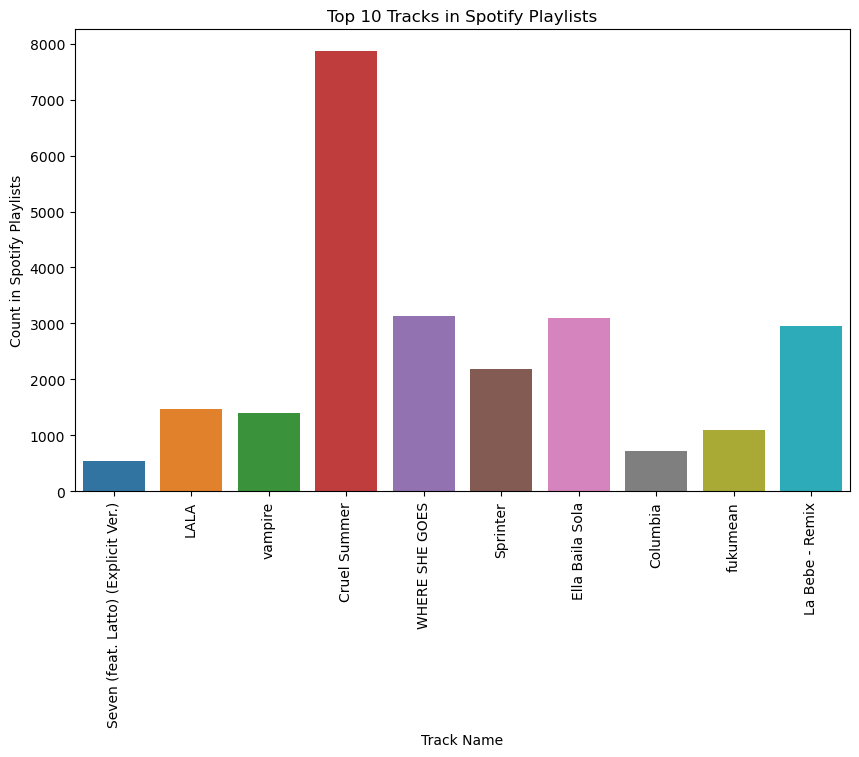

In [20]:
# Bar chart for Topt 10 Tracks in Spotify Playlists
# Data from "playlists" table
plt.figure(figsize=(10, 6))
sns.barplot(x='track_name', y='in_spotify_playlists', data=playlists_df.head(10))
plt.title('Top 10 Tracks in Spotify Playlists')
plt.xlabel('Track Name')
plt.ylabel('Count in Spotify Playlists')
plt.xticks(rotation=90)  # Set rotation to 90 degrees
plt.show()

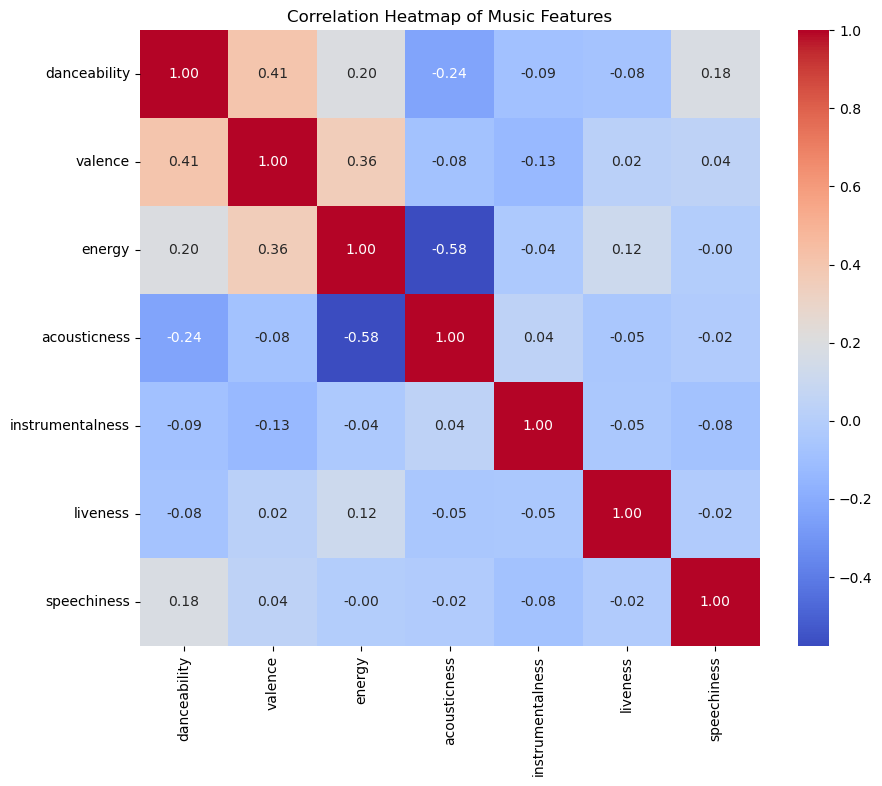

In [36]:
# Heat map showing corellation of different music "features" in spotify data
# Data from "listener_experience" table
correlation_matrix = spotify_renamed[['danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Music Features')
plt.show()

In [21]:
# Create function to calculate linear regression that will be used in scatter plots below to
# derive and plot correlations

#define the function
def plot_linear_regression(x_values, y_values, x_axis, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values, marker="D")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="black")
    plt.xlabel(x_axis)
    plt.ylabel(title)
    print(f"The r² value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    print(f"The p value is: {pvalue}")
    plt.grid(True)

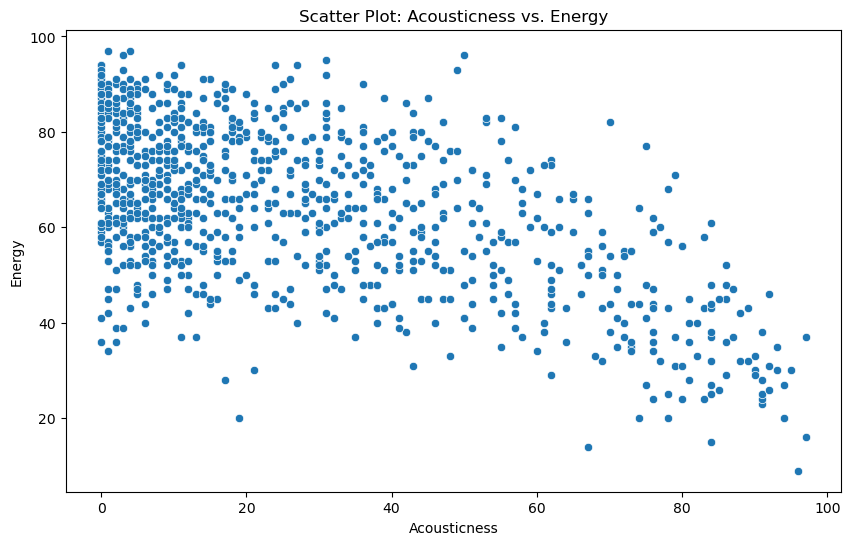

In [22]:
# Scatter plot showing relationship between "acousticness" and "energy"
# Data from "listener_experience" table
plt.figure(figsize=(10, 6))
sns.scatterplot(x='acousticness', y='energy', data=spotify_renamed)
plt.title('Scatter Plot: Acousticness vs. Energy')
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.show()

The r² value is: 0.3333263460350711
The r value is: -0.5773442179801155
The p value is: 8.339975569548671e-86


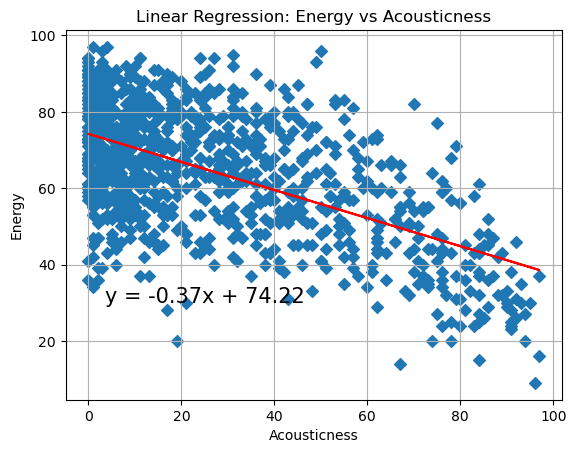

In [23]:
# Use linear regression function to do show statistical relationship between "acousticness" and "energy"
x_values = spotify_renamed['acousticness']
y_values = spotify_renamed['energy']
plt.title('Linear Regression: Energy vs Acousticness')
plot_linear_regression(x_values, y_values, 'Acousticness', 'Energy', (3.5,30))

Looking at the linear regression above, we can determine that there is a clear negative correlation between "acousticness" and "energy" with a solid r value of -.57. Additionally the p-value is *very* well below the threshold of .05 where we can say that there is no relationship between the two variables.

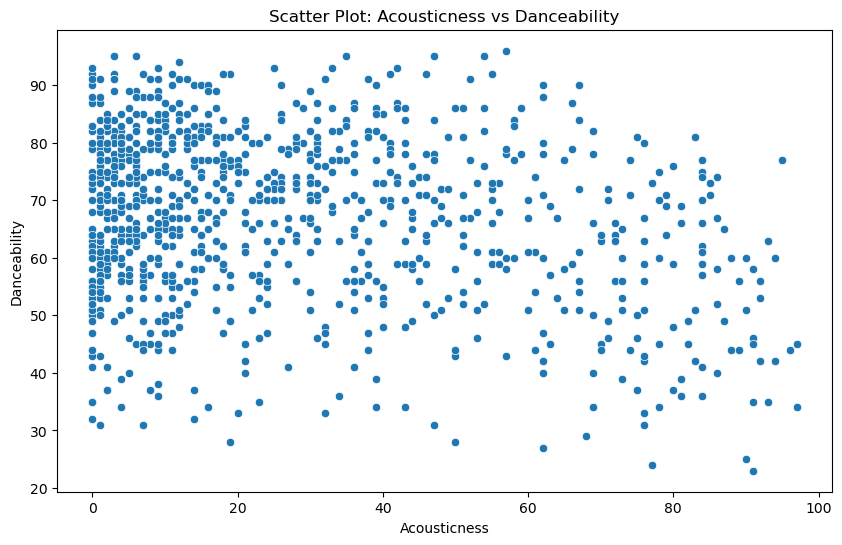

In [24]:
# Scatter plot showing relationship between "acousticness" and "danceablility"
# Data from "listener_experience" table
plt.figure(figsize=(10, 6))
sns.scatterplot(x='acousticness', y='danceability', data=spotify_renamed)
plt.title('Scatter Plot: Acousticness vs Danceability')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.show()

The r² value is: 0.0557741408259539
The r value is: -0.23616549457097644
The p value is: 1.5160208603259472e-13


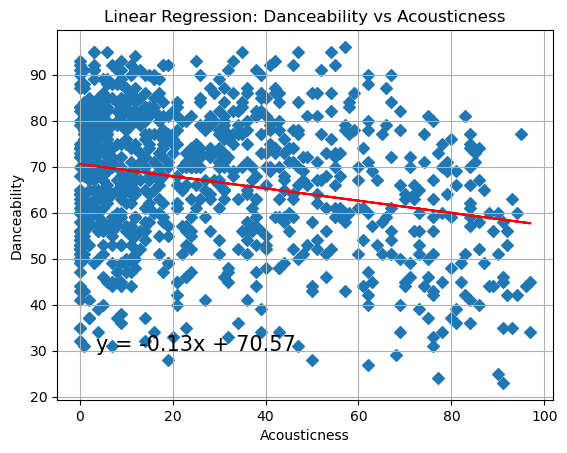

In [26]:
# Use linear regression function to do show statistical relationship between "acousticness" and "danceablility"
x_values = spotify_renamed['acousticness']
y_values = spotify_renamed['danceability']
plt.title('Linear Regression: Danceability vs Acousticness')
plot_linear_regression(x_values, y_values, 'Acousticness', 'Danceability', (3.5,30))

Looking at this regression, there is also a modest negative correlation between "acousticness" and "danceability" of -.023.
Again the p-value is well below the threshold to say that there is no relationship between the two variables.

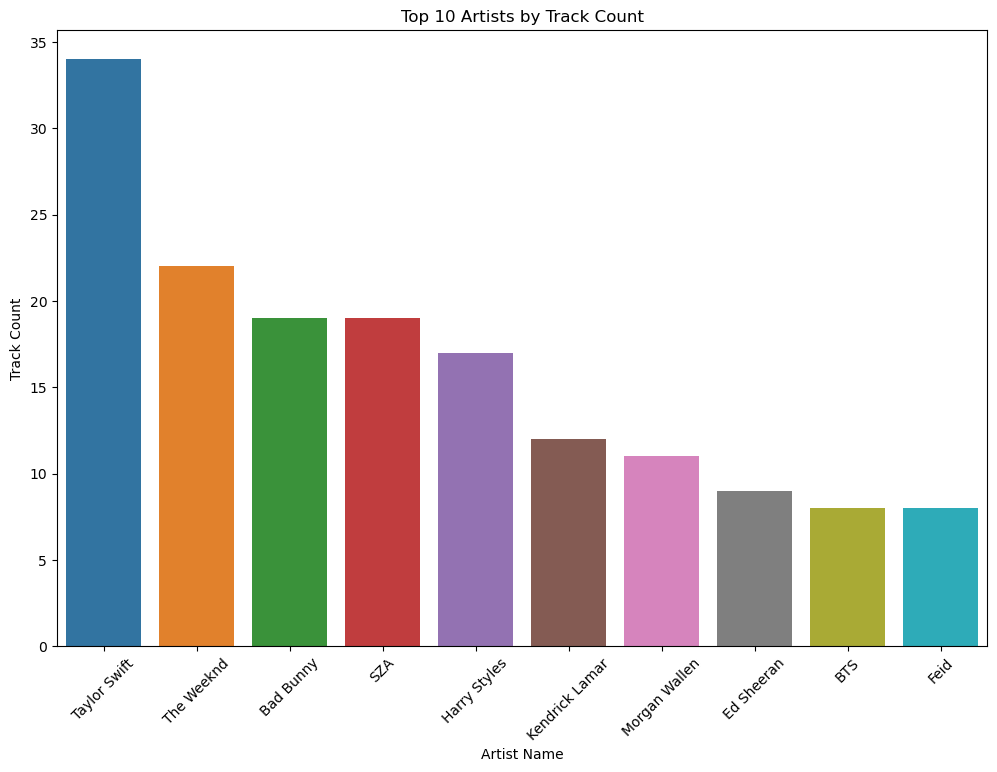

In [27]:
# "Tract_info" table
top_artists = spotify_renamed['artists_name'].value_counts().head(10)

# Bar chart to show top 10 artists in data by track count
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title('Top 10 Artists by Track Count')
plt.xlabel('Artist Name')
plt.ylabel('Track Count')
plt.xticks(rotation=45)
plt.show()

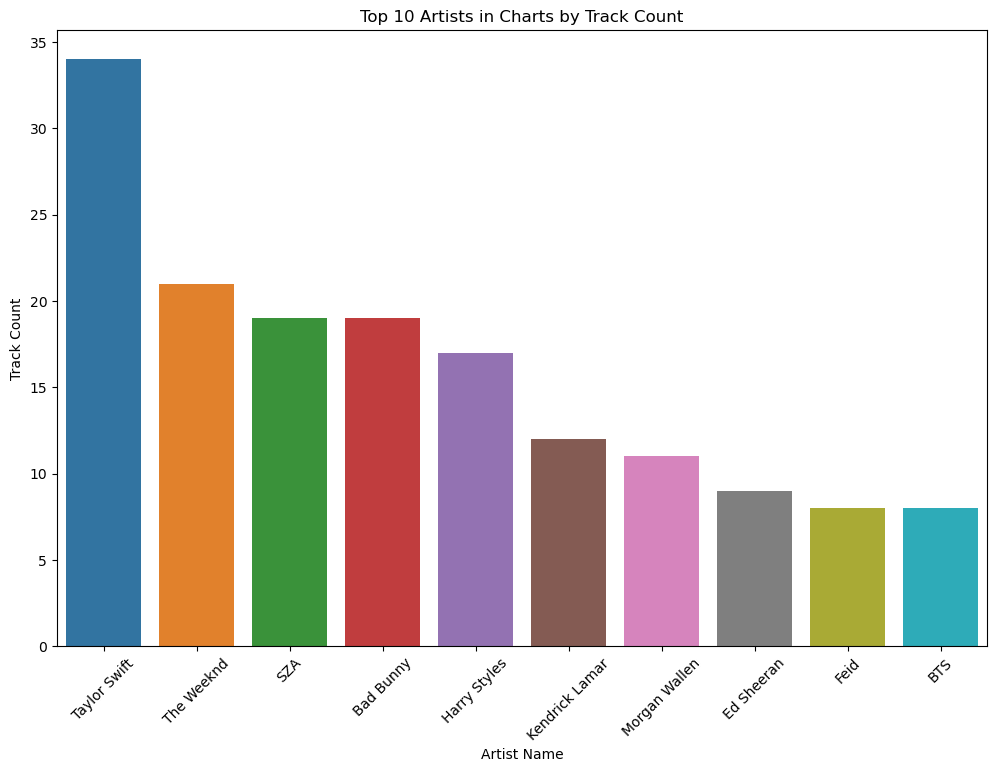

In [28]:
# Charts "table"
top_artists_charts = charts_df['artists_name'].value_counts().head(10)

# Bar chart showing top artists in the "charts" count
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists_charts.index, y=top_artists_charts.values)
plt.title('Top 10 Artists in Charts by Track Count')
plt.xlabel('Artist Name')
plt.ylabel('Track Count')
plt.xticks(rotation=45)
plt.show()

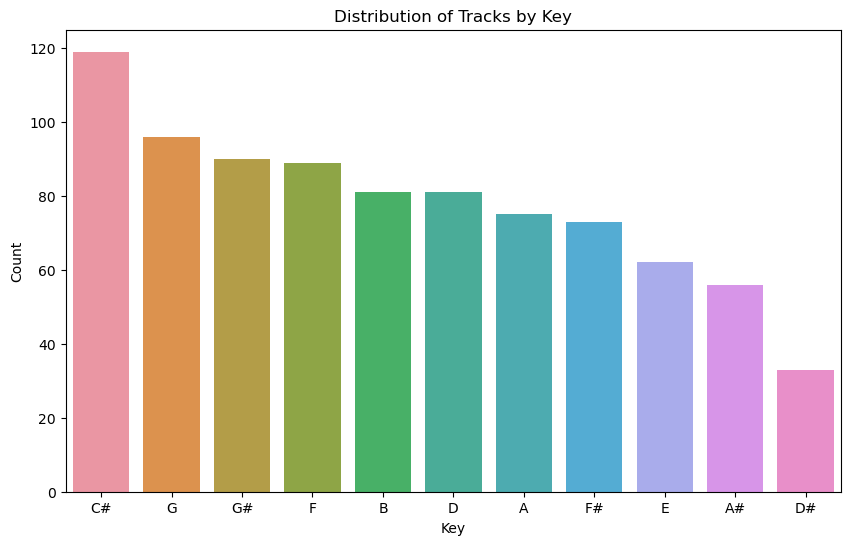

In [29]:
# Bar chart showing frequency of keys used in different music tracks

plt.figure(figsize=(10, 6))
sns.countplot(x='key', data=track_properties_df, order=track_properties_df['key'].value_counts().index)
plt.title('Distribution of Tracks by Key')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()

In [30]:
# Calculate percent of tracks in C#

total_tracks = len(track_properties_df)
tracks_in_c_sharp = len(track_properties_df[track_properties_df['key'] == 'C#'])

percentage_in_c_sharp = (tracks_in_c_sharp / total_tracks) * 100

print(f"The percentage of tracks in C# key: {percentage_in_c_sharp:.2f}%")


The percentage of tracks in C# key: 12.54%
